In [105]:
install.packages("viridis")

also installing the dependency 'gridExtra'





The downloaded binary packages are in
	/var/folders/1_/0gj_v5x54fxd8gllt64jsbp80000gn/T//RtmprWleXR/downloaded_packages


In [23]:
library(dplyr)
library(ggplot2)
library(scales)


In [9]:
setwd("../Data")
getwd()
df_cars <- read.csv("autos_random_50k_cleaned.csv")

[1] "/Users/miguelmonreal/Desktop/Semestres/Oto\303\261o2025/FinalProyect/Data"

In [14]:
df_cars

X,date_crawled,car_name,price_EUR,ab_test,vehicle_type,registration_year,transmission,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<fct>,<chr>,<chr>,<int>,<chr>
1,2016-04-02 14:51,Astra_G_Cabrio_Turbo_235_PS,5200,test,cabrio,2002,manuell,235,astra,125000,5,Unknown,opel,nein,2016-04-02 0:00,47652,2016-04-06 13:17
2,2016-03-19 18:36,Fiat_Grande_Punto_1.2_8V__MIT_2_JAHREN_GARANTIE,3400,test,kleinwagen,2006,manuell,65,andere,125000,5,benzin,fiat,nein,2016-03-19 0:00,66538,2016-04-07 7:15
3,2016-03-09 20:59,Volvo_XC60_D5_AWD_Aut.,5200,test,suv,2009,automatik,220,xc_reihe,150000,3,diesel,volvo,ja,2016-03-09 0:00,72762,2016-03-16 5:46
4,2016-03-26 15:55,Kombi_Technisch_super_in_Schuss,750,test,kombi,2000,manuell,112,mondeo,150000,12,benzin,ford,Unknown,2016-03-26 0:00,39446,2016-03-26 15:55
5,2016-03-29 14:47,Audi_A4_1.9_TDI_quattro_Delphingrau,3522,test,limousine,2004,manuell,131,a4,150000,7,diesel,audi,nein,2016-03-29 0:00,51373,2016-03-29 14:47
6,2016-03-23 19:43,Ford_Mondeo_V6_170_PS,550,control,limousine,1999,automatik,170,mondeo,150000,6,benzin,ford,Unknown,2016-03-23 0:00,25451,2016-03-26 12:47
7,2016-03-12 13:46,BMW_320d_DPF_Touring,10400,control,kombi,2008,manuell,177,3er,125000,5,diesel,bmw,nein,2016-03-12 0:00,94107,2016-04-06 20:19
12,2016-03-30 18:37,BMW_318i_dunkelblau,2499,test,kombi,2000,manuell,118,3er,150000,1,benzin,bmw,nein,2016-03-30 0:00,4463,2016-04-03 8:47
13,2016-03-26 2:57,Cadillac_CTS_3.6_V6_Sport_Wagon_AWD___SPORT__LUXURY,14500,test,kombi,2011,automatik,311,Unknown,150000,7,benzin,sonstige_autos,nein,2016-03-26 0:00,22305,2016-04-05 19:47


In [109]:
dim(df_cars)

[1] 37866    18

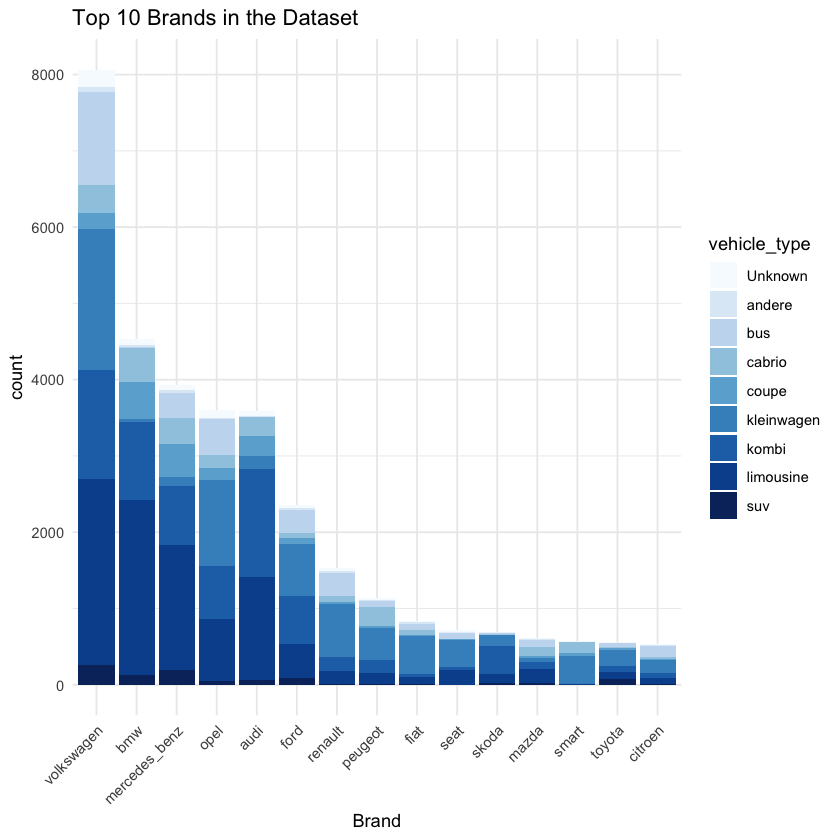

In [99]:
# Filtrar las 10 marcas más altas
top_brands <- names(sort(table(df_cars$brand), decreasing = TRUE))[1:15]

df_cars_2 <- df_cars %>%
    filter(brand %in% top_brands) %>%
    mutate(brand = factor(brand, levels = top_brands))

barras <- ggplot(df_cars_2, aes(x = brand, fill = vehicle_type)) +
    geom_bar(position = "stack") +
    scale_fill_brewer(palette = "Blues") +
    labs(title = "Top 10 Brands in the Dataset",
         x = "Brand") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
barras


Warning message:
"Removed 17697 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 17697 rows containing non-finite outside the scale range
(`stat_summary()`)."
Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
"


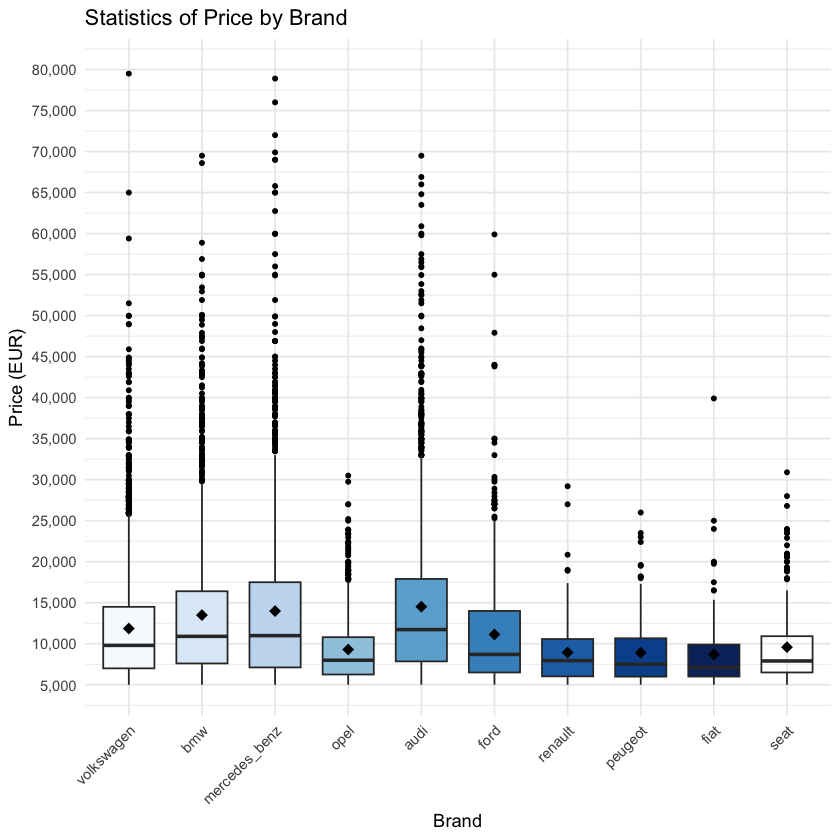

In [100]:
top_brands <- names(sort(table(df_cars$brand), decreasing = TRUE))[1:10]

df_cars_2 <- df_cars %>%
    filter(brand %in% top_brands) %>%
    mutate(brand = factor(brand, levels = top_brands))


boxplot <- ggplot(df_cars_2, aes(x = brand, y = price_EUR, fill = brand)) +
    geom_boxplot(width = 0.7, outlier.colour = "black", outlier.size = 1) +
    stat_summary(fun = mean, geom = "point", shape = 18, size = 3, color = "black") +
    labs(title = "Statistics of Price by Brand",
         x = "Brand",
         y = "Price (EUR)") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          legend.position = "none") +
    # Aquí recortamos el eje Y y añadimos más cortes
    scale_y_continuous(
        labels = comma,
        limits = c(5000, 80000),        # No inicia en 0
        breaks = seq(5000, 80000, 5000) # Cortes cada 5,000 EUR
    )+ 
    scale_fill_brewer(palette = "Blues")
boxplot


Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
"


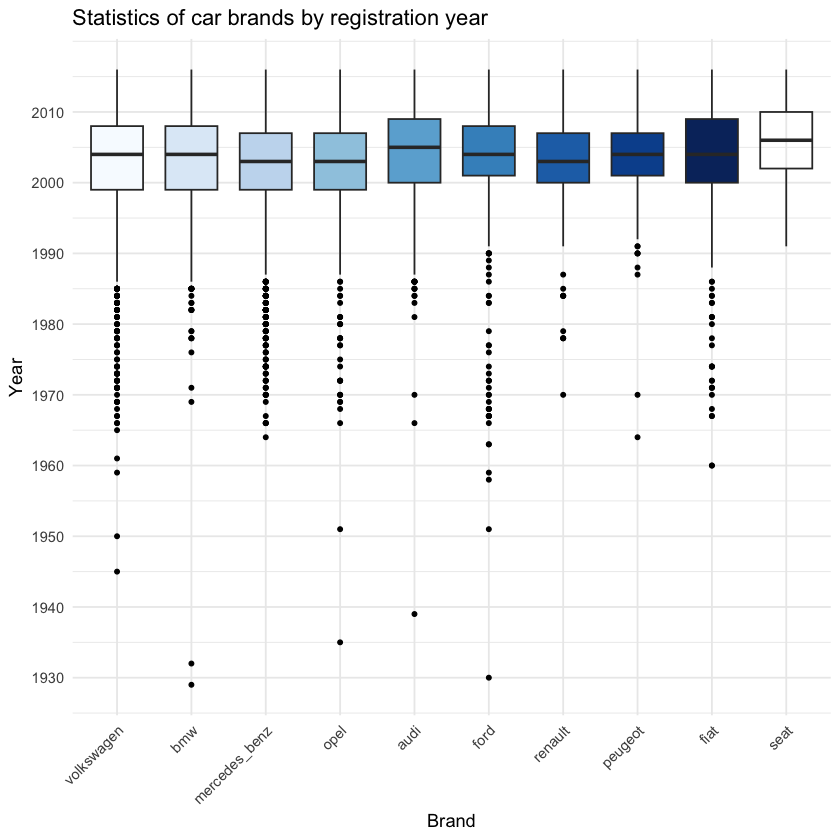

In [102]:


boxplot <- ggplot(df_cars_2, aes(x = brand, y = registration_year, fill=brand)) +
    geom_boxplot(width = 0.7, outlier.colour = "black", outlier.size = 1) +
    labs(title = "Statistics of car brands by registration year",
         x = "Brand",
         y = "Year") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          legend.position = "none") +
    scale_y_continuous(
        limits = c(1929, 2016),        # Ajusta los límites del eje Y
        breaks = seq(1930, 2016, 10)   # Define cortes cada 5 años
    ) +
    scale_fill_brewer(palette = "Blues")

boxplot


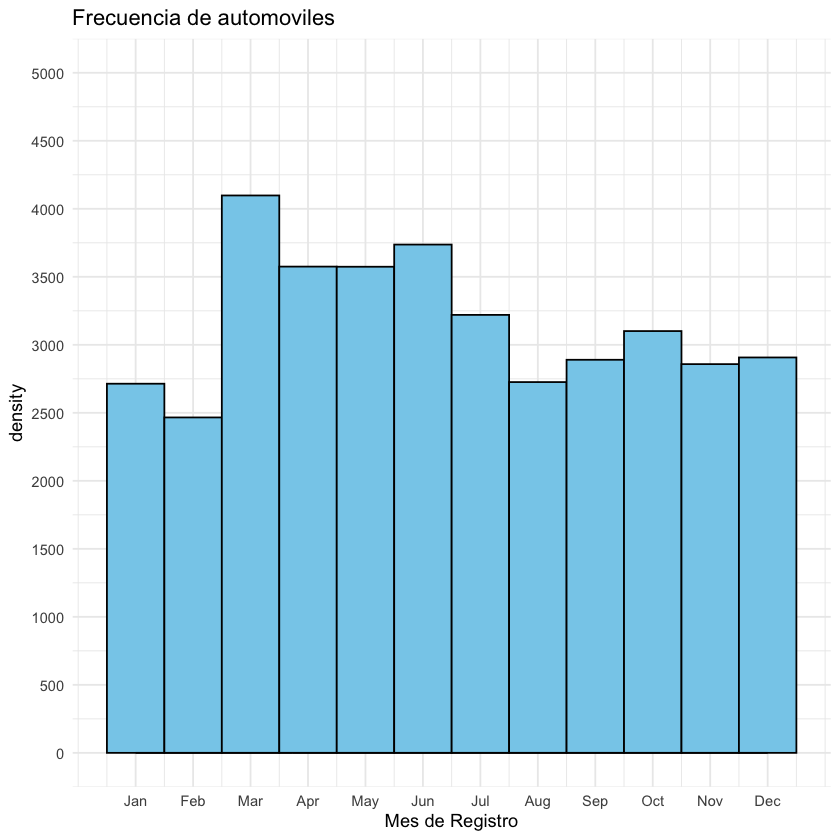

In [75]:
ggplot(df_cars, aes(x = registration_month)) +
    geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
    geom_histogram(aes(y = ..density..), bins = 12) +
    geom_density(adjust = 2, alpha = 0.2, fill = "red") +
    scale_x_continuous(breaks = 1:12, labels = month.abb) +
    scale_y_continuous(
        limits = c(0, 5000),        # Ajusta los límites del eje Y
        breaks = seq(0, 5000, 500) # Define cortes cada 500
    ) +
    labs(title = "Frecuencia de automoviles",
         x = "Mes de Registro") +
    theme_minimal()

Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
"


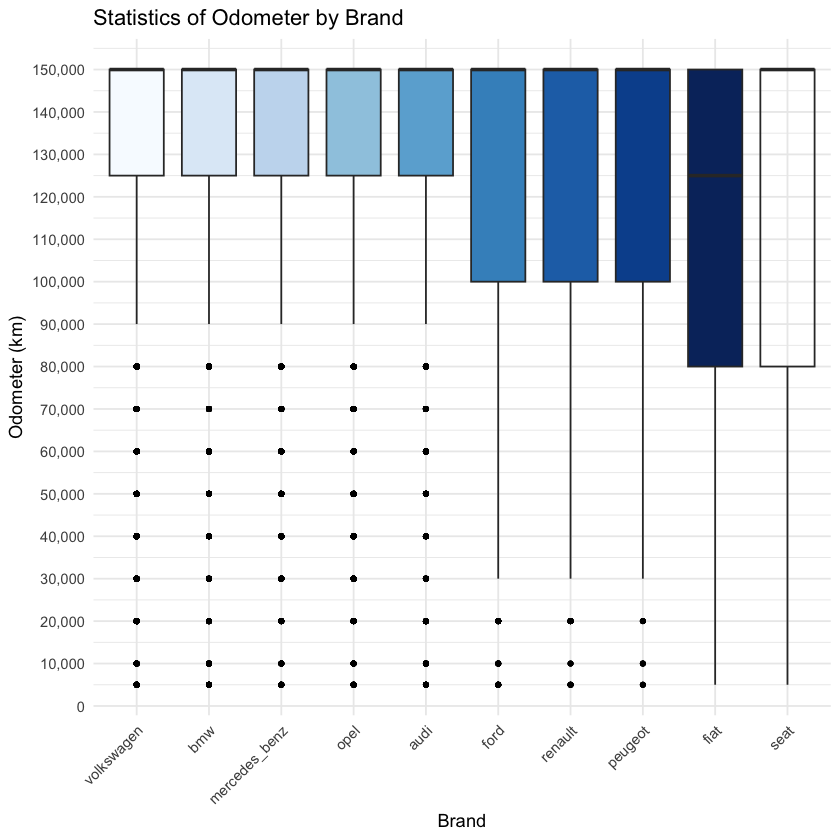

In [108]:

library(scales)

ggplot(df_cars_2, aes(x = brand, y = odometer_km, fill = brand)) +
  geom_boxplot(width = 0.75, outlier.colour = "black", outlier.size = 1) +
  labs(title = "Statistics of Odometer by Brand",
       x = "Brand", y = "Odometer (km)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_y_continuous(
    labels = comma,
    breaks = scales::breaks_extended(n = 12),   # más marcas “bonitas”
    minor_breaks = waiver()                     # agrega menores para la grilla fina
  ) + 
  scale_fill_brewer(palette = "Blues")


In [78]:
summary(df_cars_2$odometer_km)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5000  100000  150000  125960  150000  150000 